In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor  as vif

In [38]:
df = pd.read_csv('readydata.csv')
df.head(3)

,Unnamed: 0,salary,gender,experience,age,mariage_status,children,health_problems,health_lvl,education,workweek,work_field,has_subs,count_subs
0,0,30000.0,1,25.0,49.0,0,1.0,0,2,0,45.0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,0,6.0
1,1,30000.0,0,21.0,47.0,1,2.0,0,3,1,40.0,ОПЕРАЦИИ С НЕДВИЖИМОСТЬЮ,1,6.0
2,2,26000.0,1,4.0,26.0,0,2.0,1,2,0,40.0,ДРУГАЯ ОТРАСЛЬ ТЯЖЕЛОЙ ПРОМЫШЛЕННОСТИ,1,5.0


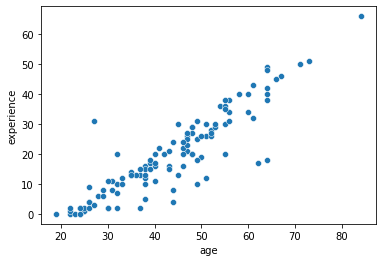

In [34]:
# корреляция возраста и опыта работы
plt.clf()
sb.scatterplot(data=df, x="age", y="experience")
plt.savefig('img/exp_age_corr.png')

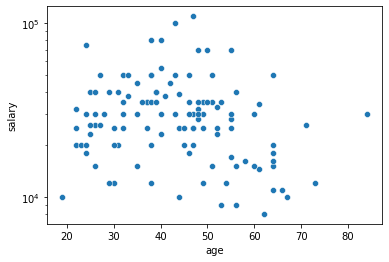

In [33]:
# корреляция возраста и логарифма зп
plt.clf()
splot = sb.scatterplot(data=df, y="salary", x="age")
splot.set(yscale="log")
# plt.show()
plt.savefig('img/logsalsary_age_corr.png')

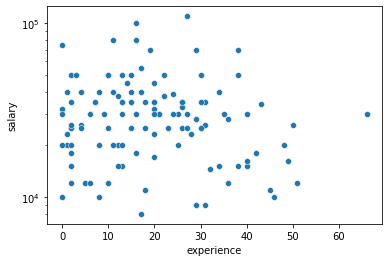

In [35]:
# корреляция возраста и логарифма зп
plt.clf()
splot = sb.scatterplot(data=df, y="salary", x="experience")
splot.set(yscale="log")
# plt.show()
plt.savefig('img/logsalsary_exp_corr.png')

<AxesSubplot:>

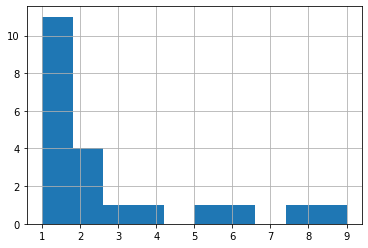

In [51]:
df[df['gender']==1]['salary'].value_counts().hist()
df.plot.hist(bins=12, alpha=0.5)

In [52]:
ff = df[df['gender']==0]

In [53]:
ff = ff.join(df[df['gender']==0]['salary'])

ValueError: columns overlap but no suffix specified: Index(['salary'], dtype='object')

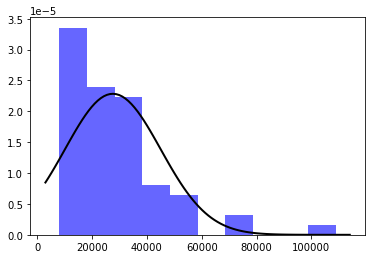

In [81]:
from scipy.stats import norm
mu, std = norm.fit(df[df['gender']==0]['salary']) 
# df[df['gender']==0]['salary'].hist(bins=10)
plt.hist(df[df['gender']==0]['salary'], bins=10, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.savefig('img/salary_gender_female_approx.png')

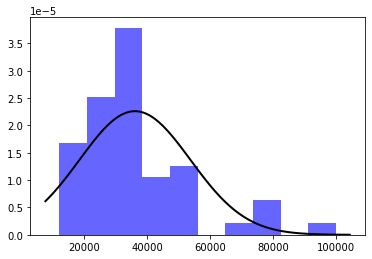

In [80]:
from scipy.stats import norm
mu, std = norm.fit(df[df['gender']==1]['salary']) 
# df[df['gender']==0]['salary'].hist(bins=10)
plt.hist(df[df['gender']==1]['salary'], bins=10, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)

plt.savefig('img/salary_gender_male_approx.png')

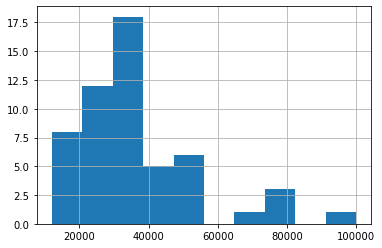

In [64]:
df[df['gender']==1]['salary'].hist(bins=10)
plt.savefig('img/salary_gender_male.png')